**Name:** Shihabur Rahman Samrat

For this project I used two models -


1.   Random Forest Classfier (named as "clf")
2.   Support Vector Machine Classifier (named as "svm")

*Feel free to reach me in case there are any issues regarding running the code at - shihabur.samrat@abo.fi*


# Step 0 - Importing Libraries

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report

# Step 1 - Data Processing

In [ ]:
# Read CSV file from public git repository
url = 'https://raw.githubusercontent.com/ShihaburRahmann/data_science_p1/master/MP2_Data.csv'
df = pd.read_csv(url)

In [ ]:
print('Shape of data: ' + str(df.shape))

Shape of data: (107, 48)


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 107 entries, 0 to 106
Data columns (total 48 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   ID           107 non-null    object 
 1   Week2_Quiz1  107 non-null    float64
 2   Week3_MP1    107 non-null    float64
 3   Week3_PR1    107 non-null    float64
 4   Week5_MP2    107 non-null    float64
 5   Week5_PR2    107 non-null    float64
 6   Week7_MP3    107 non-null    float64
 7   Week7_PR3    107 non-null    float64
 8   Week4_Quiz2  107 non-null    float64
 9   Week6_Quiz3  107 non-null    float64
 10  Week8_Total  107 non-null    float64
 11  Week1_Stat0  107 non-null    int64  
 12  Week1_Stat1  107 non-null    int64  
 13  Week1_Stat2  107 non-null    int64  
 14  Week1_Stat3  107 non-null    int64  
 15  Week2_Stat0  107 non-null    int64  
 16  Week2_Stat1  107 non-null    int64  
 17  Week2_Stat2  107 non-null    int64  
 18  Week2_Stat3  107 non-null    int64  
 19  Week3_St

In [ ]:
# Check for missing values
missing_values = df.isnull().sum()
print("Missing Values:\n", missing_values)

Missing Values:
 ID             0
Week2_Quiz1    0
Week3_MP1      0
Week3_PR1      0
Week5_MP2      0
Week5_PR2      0
Week7_MP3      0
Week7_PR3      0
Week4_Quiz2    0
Week6_Quiz3    0
Week8_Total    0
Week1_Stat0    0
Week1_Stat1    0
Week1_Stat2    0
Week1_Stat3    0
Week2_Stat0    0
Week2_Stat1    0
Week2_Stat2    0
Week2_Stat3    0
Week3_Stat0    0
Week3_Stat1    0
Week3_Stat2    0
Week3_Stat3    0
Week4_Stat0    0
Week4_Stat1    0
Week4_Stat2    0
Week4_Stat3    0
Week5_Stat0    0
Week5_Stat1    0
Week5_Stat2    0
Week5_Stat3    0
Week6_Stat0    0
Week6_Stat1    0
Week6_Stat2    0
Week6_Stat3    0
Week7_Stat0    0
Week7_Stat1    0
Week7_Stat2    0
Week7_Stat3    0
Week8_Stat0    0
Week8_Stat1    0
Week8_Stat2    0
Week8_Stat3    0
Week9_Stat0    0
Week9_Stat1    0
Week9_Stat2    0
Week9_Stat3    0
Grade          0
dtype: int64


In [ ]:
# Check if column has same value for each row, then it's redundant
for col in df.columns:
  if df[col].nunique() == 1:
    print(str(col) + ' dropped.')
    df.drop(col, axis=1, inplace=True)

Week1_Stat1 dropped.


In [ ]:
# Create a correlation matrix for the target variable
selected_df = df.drop('ID', axis=1)
correlation_matrix = selected_df.corr()
correlation_with_grade = abs(correlation_matrix['Grade'])

# Select features with a correlation greater than 0.3 or lesser than -0.3 with the target variable
features = correlation_with_grade[correlation_with_grade >= 0.3]
features = features.index.tolist()[:-1]
print("Selected features - ")
print(features)
features = df[features]

Selected features - 
['Week2_Quiz1', 'Week3_MP1', 'Week3_PR1', 'Week5_MP2', 'Week5_PR2', 'Week7_MP3', 'Week7_PR3', 'Week4_Quiz2', 'Week6_Quiz3', 'Week8_Total', 'Week2_Stat1', 'Week3_Stat0', 'Week3_Stat1', 'Week4_Stat0', 'Week4_Stat1', 'Week5_Stat0', 'Week5_Stat1', 'Week6_Stat0', 'Week6_Stat1', 'Week7_Stat0', 'Week7_Stat1', 'Week7_Stat3', 'Week8_Stat0', 'Week8_Stat1', 'Week9_Stat0', 'Week9_Stat1']


# Step 2 – Data split: Training and Test sets

In [ ]:
# Split the data into training and test sets (e.g., 70% training, 30% testing)
X_train, X_test, y_train, y_test = train_test_split(features, df['Grade'], test_size=0.30, random_state=42)

# Step 3 – Model Training

In [ ]:
# Create a random forest classifier object
clf = RandomForestClassifier(n_jobs=2, random_state=0)
# Train the model using the training sets
clf.fit(X_train, y_train)

RandomForestClassifier(n_jobs=2, random_state=0)

In [ ]:
# Create a support vector machine object
svm = SVC(kernel='linear', random_state=0)
# Train the model using the training sets
svm.fit(X_train, y_train)

SVC(kernel='linear', random_state=0)

# Step 4 – Performance Evaluation

In [ ]:
# Apply the models we trained to the test data
clf_preds = clf.predict(X_test)
svm_preds = svm.predict(X_test)

In [ ]:
# Compare the predicted values to the actual values
print('Support Vector Machine predictions vs Actual Values - ')
pd.crosstab(y_test, svm_preds, rownames=['Actual Grades'], colnames=['Predicted Grades'])

Support Vector Machine predictions vs Actual Values - 


Predicted Grades,0,2,3,4,5
Actual Grades,,,,,
0,12,1,0,0,0
2,0,2,1,0,0
3,0,0,4,0,0
4,0,1,2,4,1
5,0,0,2,1,2


In [ ]:
# Compare the predicted values to the actual values
print('Random Forest Classifier predictions vs Actual Values - ')
pd.crosstab(y_test, clf_preds, rownames=['Actual Grades'], colnames=['Predicted Grades'])

Random Forest Classifier predictions vs Actual Values - 


Predicted Grades,0,3,4,5
Actual Grades,,,,
0,13,0,0,0
2,0,3,0,0
3,0,4,0,0
4,0,0,8,0
5,0,1,0,4


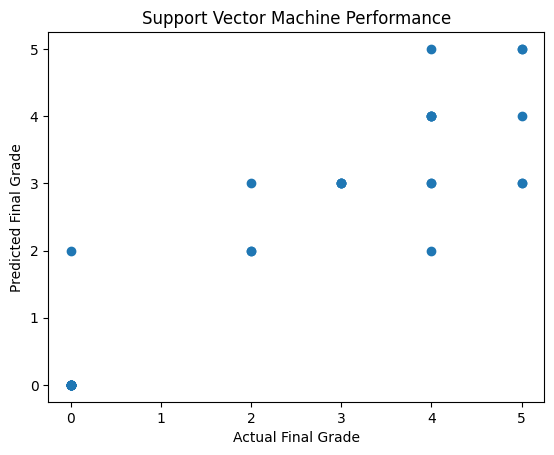

In [ ]:
# Create a scatter plot to visualize the actual vs. predicted grades for Support Vector Machine
plt.scatter(y_test, svm_preds)
plt.xlabel("Actual Final Grade")
plt.ylabel("Predicted Final Grade")
plt.title("Support Vector Machine Performance")
plt.show()

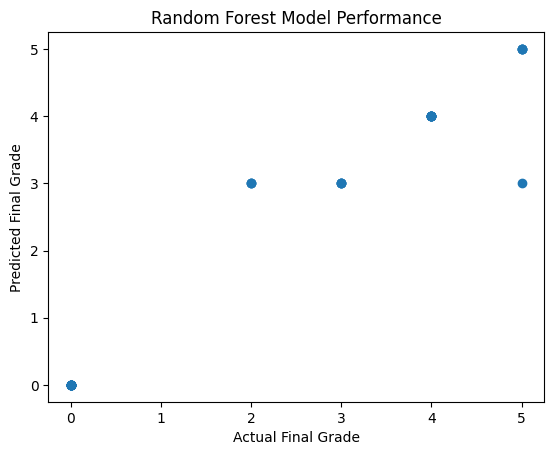

In [ ]:
# Create a scatter plot to visualize the actual vs. predicted grades for Random Forest
plt.scatter(y_test, clf_preds)
plt.xlabel("Actual Final Grade")
plt.ylabel("Predicted Final Grade")
plt.title("Random Forest Model Performance")
plt.show()

In [ ]:
# Evaluate SVM
svm_accuracy = accuracy_score(y_test, svm_preds)
svm_classification_report = classification_report(y_test, svm_preds, zero_division=1)

# Evaluate Random Forest
rf_accuracy = accuracy_score(y_test, clf_preds)
rf_classification_report = classification_report(y_test, clf_preds, zero_division=1)

print("SVM Accuracy:", round(svm_accuracy, 2))
print("SVM Classification Report:\n", svm_classification_report)
print("Random Forest Accuracy:", round(rf_accuracy, 2))
print("Random Forest Classification Report:\n", rf_classification_report)

SVM Accuracy: 0.73
SVM Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.92      0.96        13
           2       0.50      0.67      0.57         3
           3       0.44      1.00      0.62         4
           4       0.80      0.50      0.62         8
           5       0.67      0.40      0.50         5

    accuracy                           0.73        33
   macro avg       0.68      0.70      0.65        33
weighted avg       0.79      0.73      0.73        33

Random Forest Accuracy: 0.88
Random Forest Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        13
           2       1.00      0.00      0.00         3
           3       0.50      1.00      0.67         4
           4       1.00      1.00      1.00         8
           5       1.00      0.80      0.89         5

    accuracy                           0.88        33
   macro avg     

# Step 5 – Important features

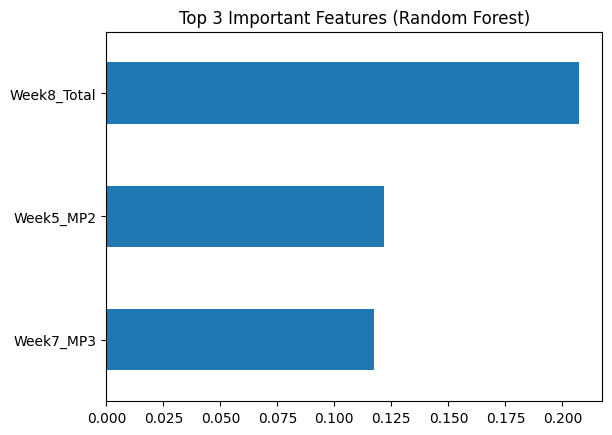

In [ ]:
# Random Forest feature importance
feature_importance = clf.feature_importances_
feature_names = X_train.columns
important_features = pd.Series(feature_importance, index=feature_names)
important_features_sorted = important_features.nlargest(3)

# Reverse the order to have the largest value at the top
important_features_sorted = important_features_sorted[::-1]

important_features_sorted.plot(kind='barh')
plt.title("Top 3 Important Features (Random Forest)")
plt.show()